## Apply Isotonic Regression on Non-Monotonic Data

* Examples about Isotonic Regression often show data with with monotic trend. What will happen if the data is not monotonic?

#### Observation
* It seems that better to apply Isotonic regression on monotonic data
* If we review [Isotonic regression's formula][1], the non-monotonic data performance below can be explained

[1]:https://en.wikipedia.org/wiki/Isotonic_regression

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import check_random_state
from sklearn.isotonic import IsotonicRegression

### Monotonic Data

In [22]:
# generate monotonic data
n = 100
x = np.arange(n)
rs = check_random_state(0)
y = rs.randint(-50, 50, size=(n,)) + 50.0 * np.log1p(np.arange(n))

# Isotonic Regression prediction
ir = IsotonicRegression(out_of_bounds="clip")
y_iso = ir.fit_transform(x, y)

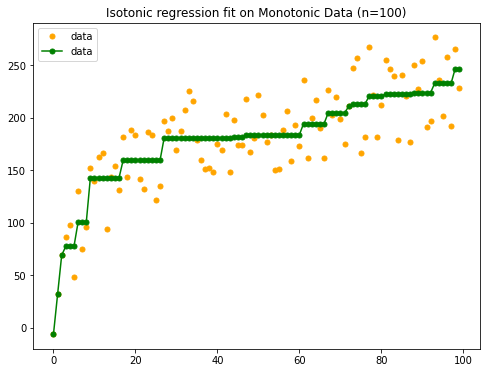

In [25]:
fig, ax = plt.subplots(ncols=1, figsize=(8, 6))

ax.plot(x, y, ".", markersize=10, label='data', color='orange')
ax.plot(x, y_iso, ".-", markersize=10, label='data', color='green')
ax.legend(loc="best")
ax.set_title("Isotonic regression fit on Monotonic Data (n=%d)" % n)
plt.show()

### Non-Monotonic Data

In [36]:
# add oppsite y values
x1 = np.arange(n*2)
y1 = np.append(y, np.flip(y))

ir = IsotonicRegression(out_of_bounds="clip")
y_iso1 = ir.fit_transform(x1, y1)

In [45]:
# add oppsite y values and shift
x2 = np.arange(n*2)
y2 = np.append(y, np.flip(y)-100)

ir = IsotonicRegression(out_of_bounds="clip")
y_iso2 = ir.fit_transform(x2, y2)

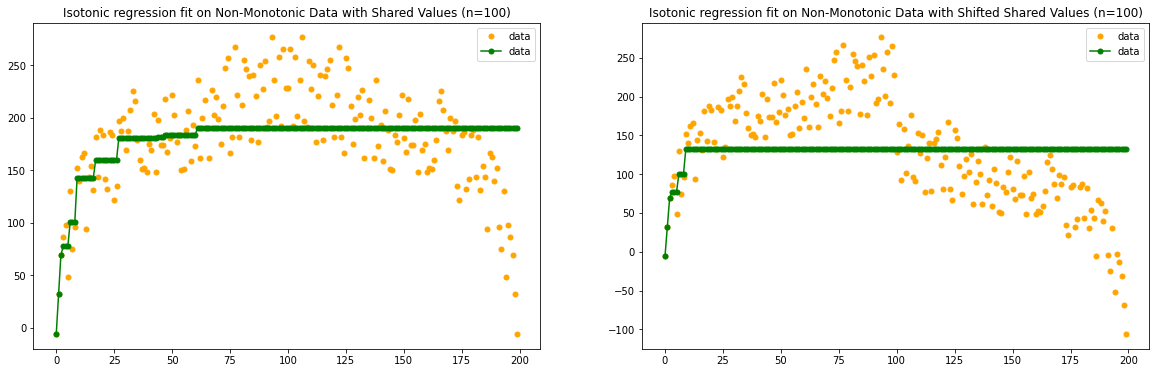

In [46]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))

ax1.plot(x1, y1, ".", markersize=10, label='data', color='orange')
ax1.plot(x1, y_iso1, ".-", markersize=10, label='data', color='green')
ax1.legend(loc="best")
ax1.set_title("Isotonic regression fit on Non-Monotonic Data with Shared Values (n=%d)" % n)

ax2.plot(x2, y2, ".", markersize=10, label='data', color='orange')
ax2.plot(x2, y_iso2, ".-", markersize=10, label='data', color='green')
ax2.legend(loc="best")
ax2.set_title("Isotonic regression fit on Non-Monotonic Data with Shifted Shared Values (n=%d)" % n)

plt.show()